In [1]:
#목표 : 각 세그먼트별 특성을 도출하여 이에 맞는 활용방안, 전략 고민하기. 
#문제 정의 : 슈퍼마켓 몰 고객 데이터 분석을 통해 고객 세그먼트를 도출한다. (Kaggle의 customer-segmentation 데이터 사용)
#결론 : VIP 고객 : 군집 1, 군집 4이며, 소비 점수가 높은 군집은 1, 4이다. 
        #잠재 VIP 고객 : 군집 2 로 연간소득은 높지만 소비 점수는 낮은 편으로, 재방문시 혜택 제공 등 재방문과 구매를 유도하는 마케팅 전략

In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [3]:
df =pd.read_csv('C:/Users/hongm/Downloads/Mall_Customers.csv')

print(df.shape)
df.info()
df.head()

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

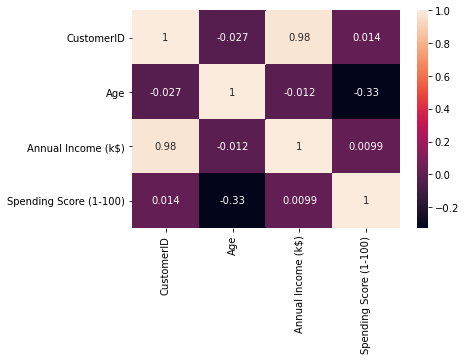

In [5]:
corr= df.corr()
sns.heatmap(corr, annot=True)

In [51]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

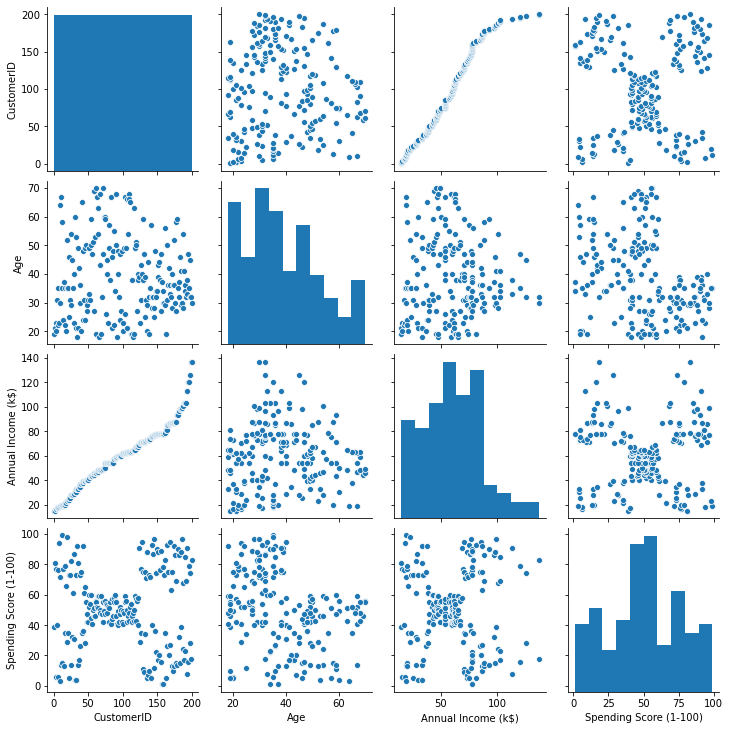

In [50]:
sns.pairplot(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']])

plt.show()

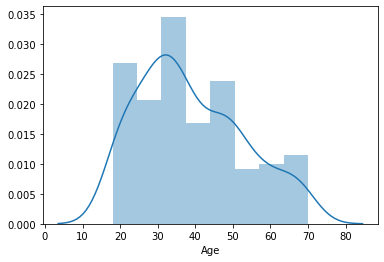

In [8]:
sns.distplot(df['Age'])

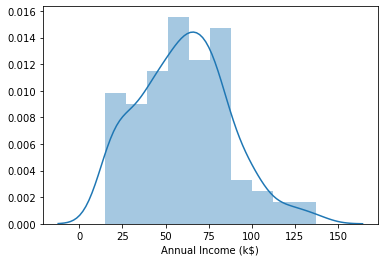

In [9]:
sns.distplot(df['Annual Income (k$)'])

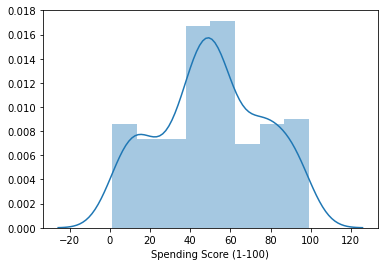

In [10]:
sns.distplot(df['Spending Score (1-100)'])

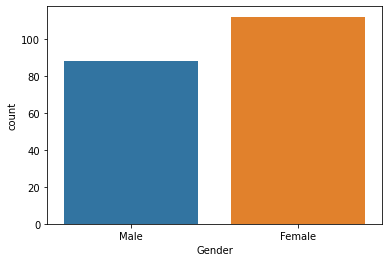

In [11]:
sns.countplot(data=df, x= 'Gender')

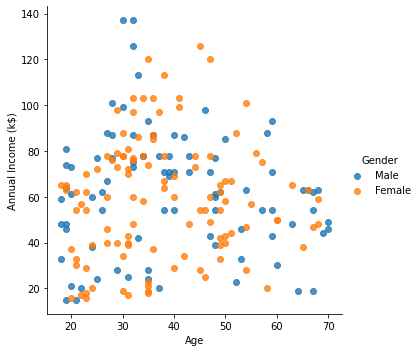

In [16]:
sns.lmplot(data=df, x= 'Age', y= 'Annual Income (k$)', hue='Gender', fit_reg= False
          )

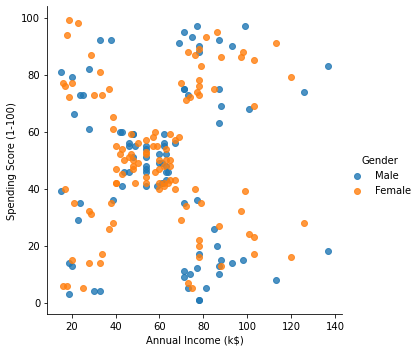

In [14]:
sns.lmplot(data=df, x= 'Annual Income (k$)', y= 'Spending Score (1-100)', hue='Gender', fit_reg= False)

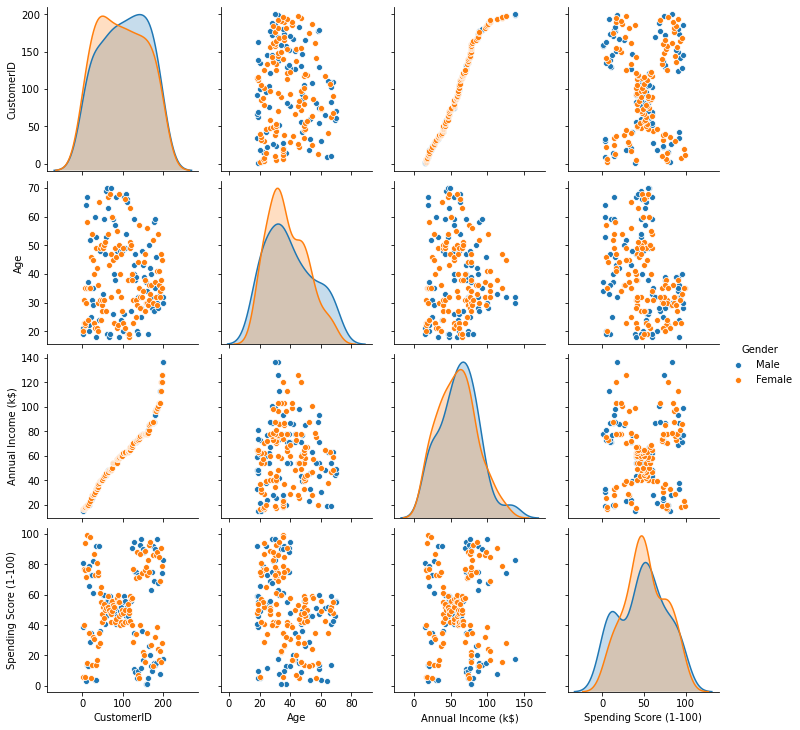

In [17]:
sns. pairplot(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']], hue = 'Gender')

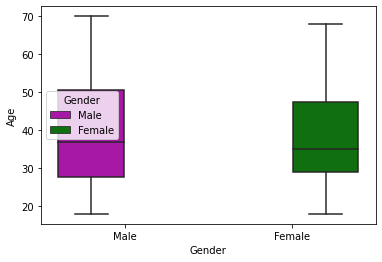

In [27]:
sns.boxplot(x='Gender', y='Age',data= df, hue='Gender', palette=['m','g'],
           )

In [38]:
#K-means를 사용한 클러스터링(데이터 분석)


# from sklearn.cluster import KMeans

# X1= df[['Age', 'Spending Score (1-100)']].values

# inertia =[]

# for n in range(1 , 11):
#     algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
#                         tol=0.0001,  random_state= 111  , algorithm='elkan') )
#     algorithm.fit(X1)
#     inertia.append(algorithm.inertia_)

from sklearn.cluster import KMeans

# X1에 'Age' , 'Spending Score (1-100)'의 값을 넣어줍니다.  
X1 = df[['Age' , 'Spending Score (1-100)']].values

# inertia 라는 빈 리스트를 만들어줍니다. 
inertia = []

# 군집수 n을 1에서 11까지 돌아가며 X1에 대해 k-means++ 알고리즘을 적용하여 inertia를 리스트에 저장합니다. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [39]:
inertia

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23810.462233071372,
 19626.205656675633,
 15514.193134351033,
 13061.513703703708,
 11461.001577367886,
 10173.03947811448]

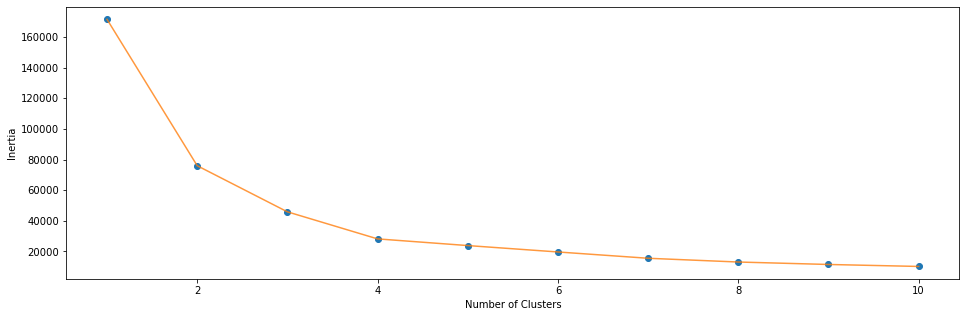

In [42]:
plt.figure(1, figsize=(16,5))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1, 11) ,inertia, '-', alpha = 0.8)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [70]:
X1= df[['Age', 'Spending Score (1-100)']].values

algorithm = (KMeans(n_clusters = 4
        ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
    

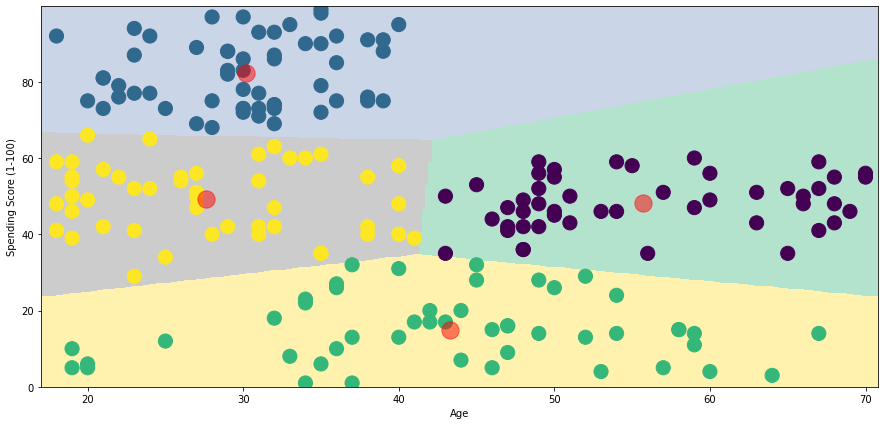

In [47]:
h = 0.2
x_min, x_max = X1[:, 0].min() -1, X1[:,0].max() +1 
y_min, y_max = X1[:, 1].min() -1, X1[:,1].max() +1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()


In [ ]:
#연령 - 소비점수를 활용한 군집 4개 
저연령-고소비 군, 저연령-중소비 군, 고연령-중소비 군, 저소비 군

이에따라, 이 수퍼마켓의 경우 소비점수가 높은 고객들은 모두 40세 이하의 젊은 고객층임을 알수 있다. 소비점수가 높은 고객들은 연령대가 비슷한 만큼 
비슷한 구매패천과 취향을 가질 가능성이 높다. 이를 더 분석하여 군집 소비자 대상 VIP 전략을 수립해볼 수 있다. 



In [78]:
# 'Annual Income (k$)' , 'Spending Score (1-100)' 두 가지 변수를 사용한 클러스터링
  
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)' ]].values

# inertia 라는 빈 리스트를 만들어줍니다. 
inertia = []

# 군집수 n을 1에서 11까지 돌아가며 X1에 대해 k-means++ 알고리즘을 적용하여 inertia를 리스트에 저장. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

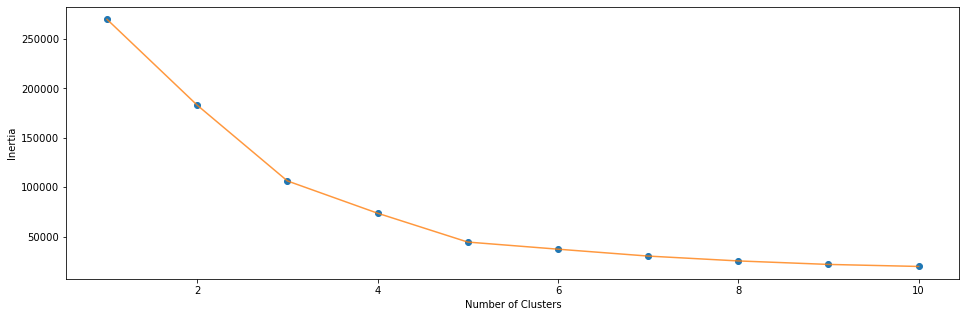

In [79]:
plt.figure(1, figsize=(16,5))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1, 11) ,inertia, '-', alpha = 0.8)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [80]:
algorithm = (KMeans(n_clusters = 5
        ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2= algorithm.labels_
centroids2 = algorithm.cluster_centers_
    

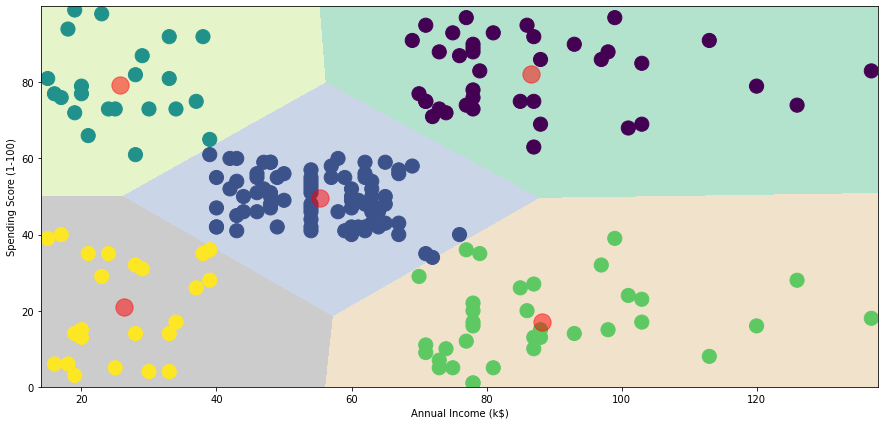

In [82]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [83]:
#실루엣 스코어를 사용한 K 선택 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.293166070535953
For n_clusters = 3 The average silhouette_score is : 0.3839349967742105
For n_clusters = 4 The average silhouette_score is : 0.40546302077733304
For n_clusters = 5 The average silhouette_score is : 0.44428597560893024
For n_clusters = 6 The average silhouette_score is : 0.4523443947724053
For n_clusters = 7 The average silhouette_score is : 0.43978902692261157
For n_clusters = 8 The average silhouette_score is : 0.43360130415308396


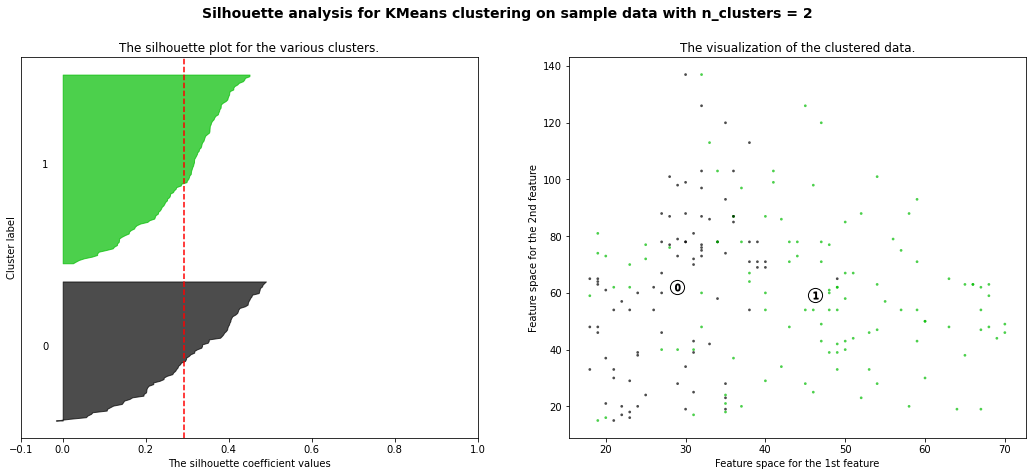

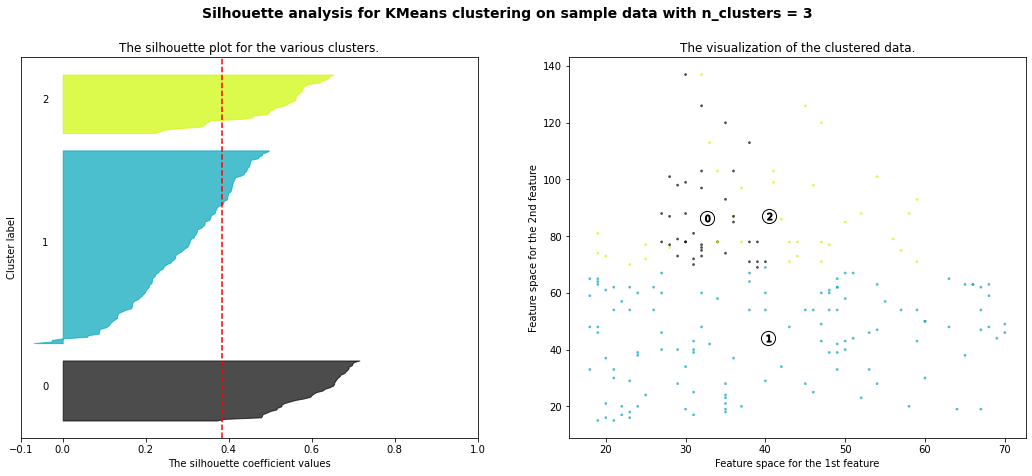

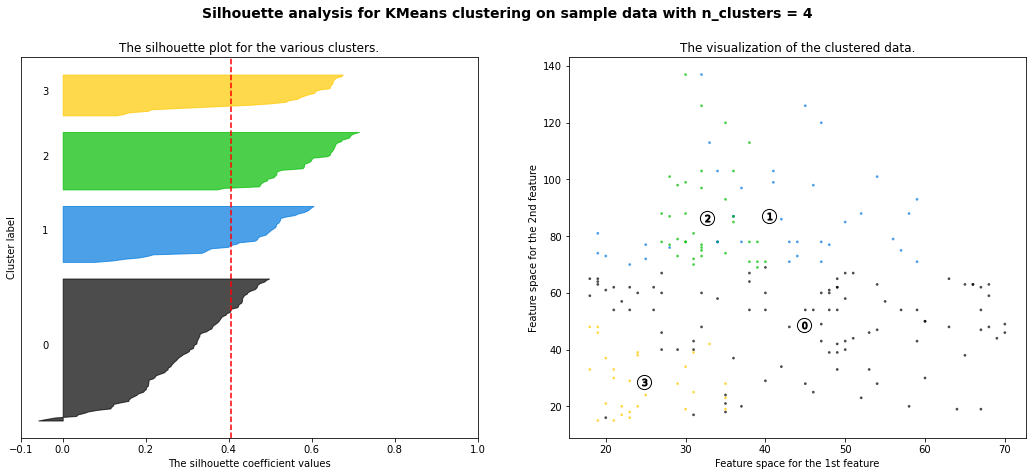

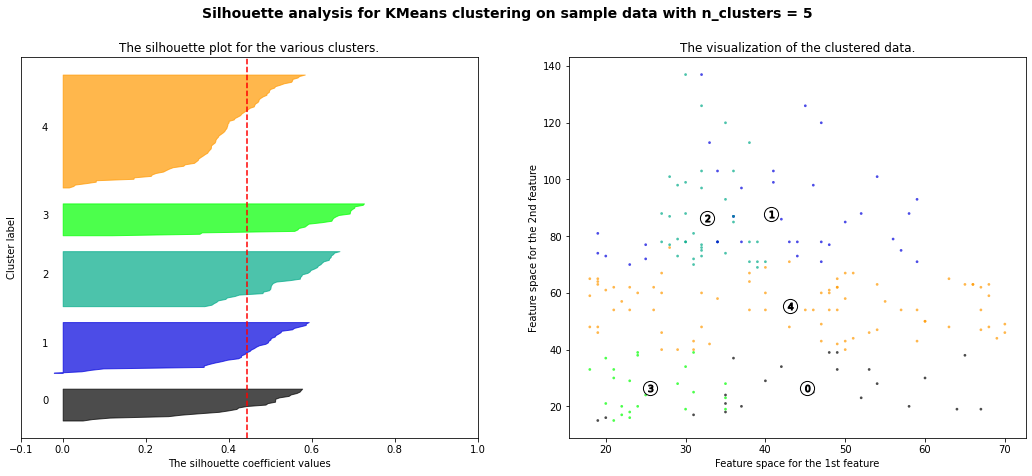

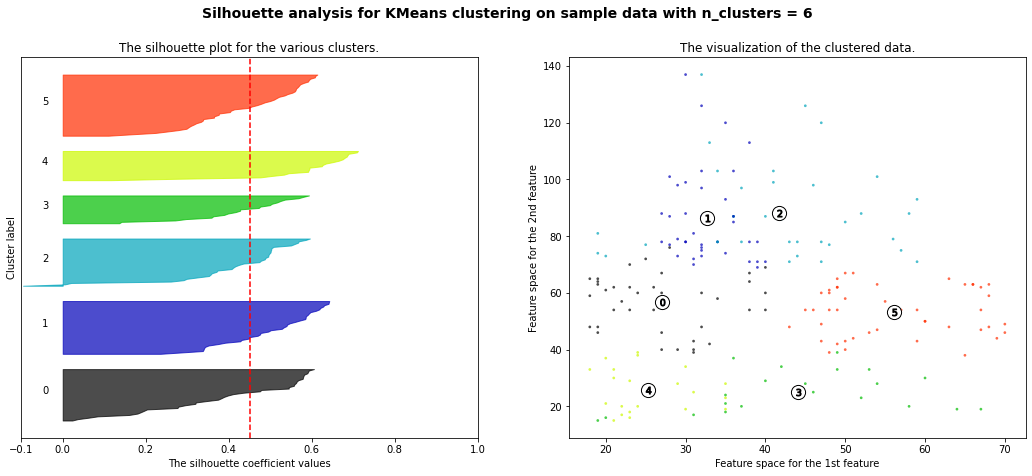

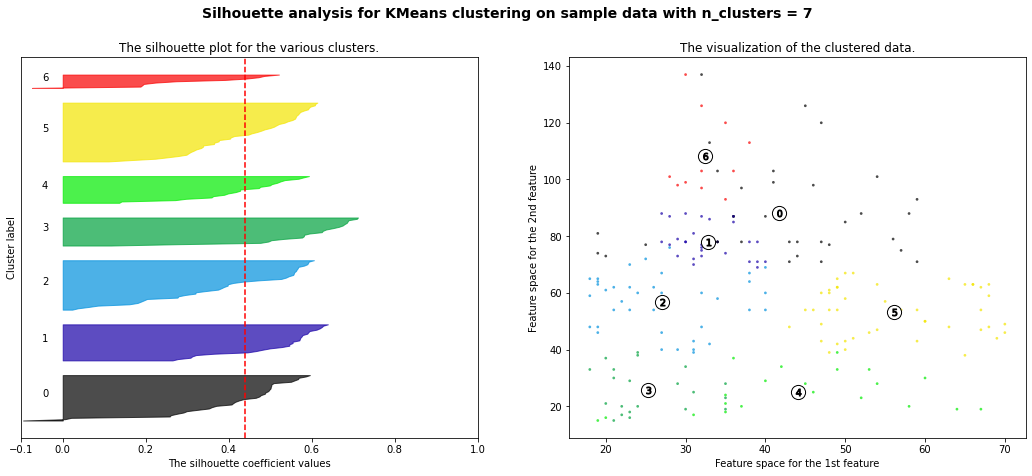

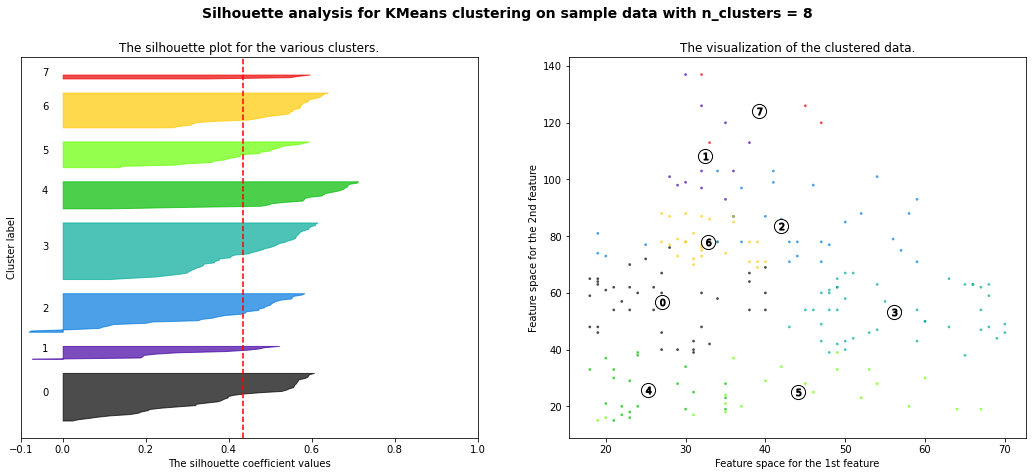

In [86]:
# 클러스터의 갯수 리스트를 만들어줍니다. 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# 사용할 컬럼 값을 지정해줍니다. 
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values


for n_clusters in range_n_clusters:
    # 1 X 2 의 서브플롯
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 첫 번째 서브플롯은 실루엣 플롯. 
. 
    ax1.set_xlim([-0.1, 1])

    # clusterer를 n_clusters 값으로 초기화 .  
    # 재현성을 위해 random seed를 10으로 지정.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # silhouette_score는 모든 샘플에 대한 평균값을 제공. 
    # 실루엣 스코어는 형성된 군집에 대해 밀도(density)와 분리(seperation). 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # 각 샘플에 대한 실루엣 스코어를 계산. 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 클러스터 i에 속한 샘플들의 실루엣 스코어를 취합하여 정렬. 
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # 각 클러스터의 이름을 달아서 실루엣 플롯의 Label을 지정. 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 플롯을 위한 새로운 y_lower를 계산.
        y_lower = y_upper + 10  # 10 for the 0 samples




    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # yaxis labels / ticks 를 지움.
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 두 번째 플롯이 실제 클러스터가 어떻게 형성되었는지 시각화 . 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    
    centers = clusterer.cluster_centers_
  
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()                           

For n_clusters = 6 The average silhouette_score is : 0.4523443947724053


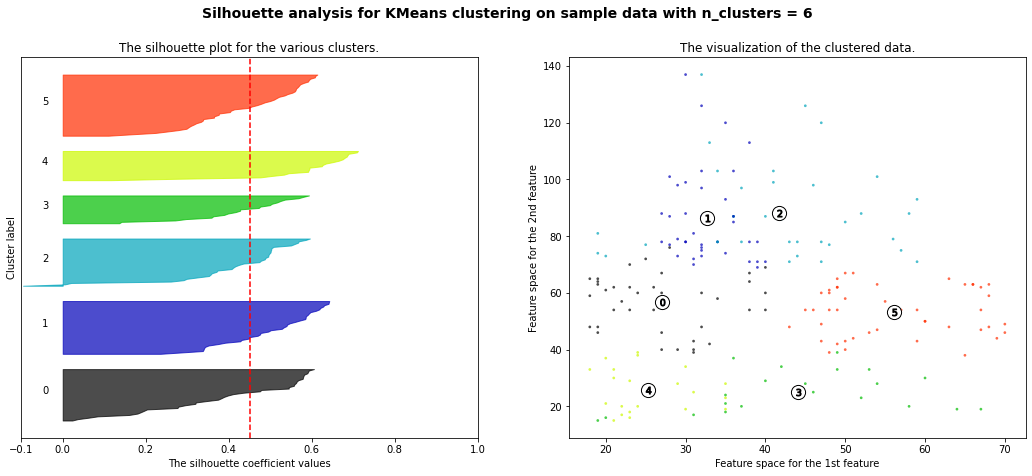

In [87]:

range_n_clusters = [6]
 
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values


for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples




    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [88]:
print(cluster_labels.shape)
print(X.shape)

(200,)
(200, 3)


In [89]:
cluster_labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 0,
       3, 4, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [90]:
df['cluster']= cluster_labels
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     cluster  
0          3  
1          4  
2          3  
3          4  
4          3  
..       ...  
195        1  
196        2  
197        1  
198        2  
199        1  

[200 rows x 6 columns]

In [91]:
df.groupby('cluster')['Age'].mean()

cluster
0    27.000000
1    32.692308
2    41.685714
3    44.142857
4    25.272727
5    56.155556
Name: Age, dtype: float64

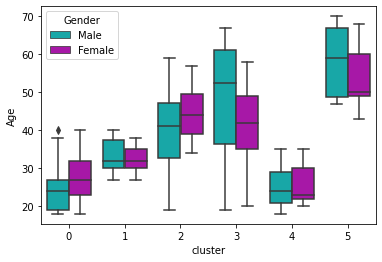

In [92]:
sns.boxplot(x='cluster', y='Age', hue='Gender', palette=['c','m'], data=df)

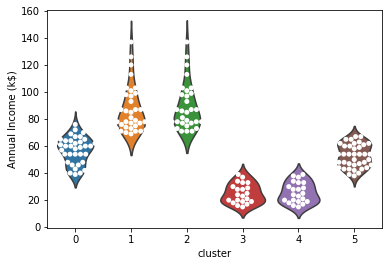

In [93]:
ax = sns.violinplot(x='cluster', y='Annual Income (k$)', data =df, inner =None)
ax = sns.swarmplot(x='cluster', y='Annual Income (k$)', data =df,  color= 'w', edgecolor= 'g' )

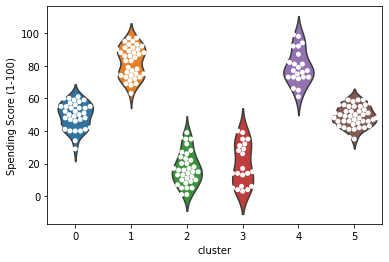

In [94]:
ax = sns.violinplot(x='cluster', y='Spending Score (1-100)', data =df, inner =None)
ax = sns.swarmplot(x='cluster', y='Spending Score (1-100)', data =df,  color= 'w', edgecolor= 'g' )

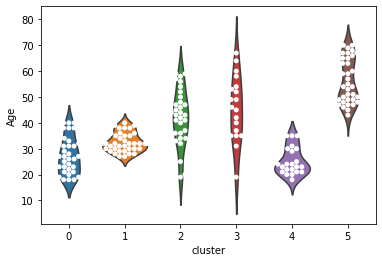

In [95]:
ax = sns.violinplot(x='cluster', y='Age', data =df, inner =None)
ax = sns.swarmplot(x='cluster', y='Age', data =df,  color= 'w', edgecolor= 'g' )

In [99]:
#3차원으로 시각화 
import plotly.graph_objs as go
import plotly as py

df['label3'] =  cluster_labels
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 20
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [98]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=963a26a2187a8258f634eb761d42b277fa46b3e0d792922f51d4bec44897bf50
  Stored in directory: c:\users\hongm\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
# 3개의 시각화를 한 화면에 배치. 
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3)

# 시각화의 사이즈를 설정 
figure.set_size_inches(20, 6)

# 클러스터별로 swarmplot을 시각화 
ax1 = sns.violinplot(x="cluster", y='Annual Income (k$)', data=df, inner=None, ax=ax1)
ax1 = sns.swarmplot(x="cluster", y='Annual Income (k$)', data=df,
                   color="white", edgecolor="gray", ax=ax1)

ax2 = sns.violinplot(x="cluster", y='Spending Score (1-100)', data=df, inner=None, ax=ax2)
ax2 = sns.swarmplot(x="cluster", y='Spending Score (1-100)', data=df,
                   color="white", edgecolor="gray", ax=ax2)

ax3 = sns.violinplot(x="cluster", y='Age', data=df, inner=None, ax=ax3)
ax3 = sns.swarmplot(x="cluster", y='Age', data=df,
                   color="white", edgecolor="gray", ax=ax3, hue="Gender")


In [ ]:
# 결과분석 

VIP 고객 : 군집 1, 군집 4

소비 점수가 높은 군집은 1, 4으로,

군집1
그 중에서도 1의 연간소득은 높은편.
잘 유도할 경우 더 많은 지출을 하게 될 가능성이 보임.
1의 연령대는 20대후반에서 40대 초반으로 젊은편.
1의 세부 고객 정보를 더 분석해서 타겟 마케팅을 기획하면 좋은 방향을 찾을 수 있을 듯하다.
고소득 젊은층이 선호할 이벤트를 기획하거나 사은품을 기획 가능.

군집4
연간 소득은 낮은편이지만 우리 mall에서의 소비점수는 높은편.
특히 우리 mall에 대한 충성도가 높고 구매비율이 높은 고객군으로 추정.
가격적인 혜택을 추가 제공하는 것을 고려. (할인쿠폰, 멤버십 등)


잠재 VIP 고객 : 군집 2

연간소득은 높지만 소비 점수는 낮은 편.
우리 mall에서 구매를 더 할 수 있는 여력이 있는 고객군.
연령은 전 연령대에 걸쳐있다.
다른 변수를 더 확보하여 잠재 VIP 고객이 될 수 있는 cluster 2 고객의 방문과 구매를 유도.
재방문시 사은품 증정, 특정 금액 이상 구매시 혜택 제공 등 재방문과 구매를 유도.